In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import time
import random

#### Import the data

In [34]:
df = pd.read_csv('data/Maryland_State_Checkbook_raw.csv')
df.head()

,Year,Employer,Vendor Name,Amount,Source
0,2021,"Maryland Department Of Health, Mdh",Priority Partners Mco,"$1,713,212,267.00","Maryland Department Of Health, Mdh"
1,2021,Maryland State Department Of Education,Prince Georges County Public School,"$1,401,301,255.00",Maryland State Department Of Education
2,2021,"Maryland Department Of Health, Mdh",Amerigroup Maryland Inc,"$1,343,588,177.00","Maryland Department Of Health, Mdh"
3,2021,"Maryland Department Of Health, Mdh",Maryland Care Inc,"$1,323,068,250.00","Maryland Department Of Health, Mdh"
4,2021,Redemption And Interest On State Bonds,Depository Trust Company,"$1,267,786,597.00",Redemption And Interest On State Bonds


#### Check for nulls

In [35]:
df.isnull().sum()

Year           0
Employer       0
Vendor Name    0
Amount         0
Source         0
dtype: int64

#### Convert the Amount column to integer by removing the "$" sign

In [36]:
def remove_symbols(amount):
    symbols = ['$' , ',']
    money = ''
    for char in amount:
        if char not in symbols:
            money += char
    return int(float(money))

In [37]:
df['Amount'] = df['Amount'].map(remove_symbols)

In [39]:
df.head()

,Year,Employer,Vendor Name,Amount,Source
0,2021,"Maryland Department Of Health, Mdh",Priority Partners Mco,1713212267,"Maryland Department Of Health, Mdh"
1,2021,Maryland State Department Of Education,Prince Georges County Public School,1401301255,Maryland State Department Of Education
2,2021,"Maryland Department Of Health, Mdh",Amerigroup Maryland Inc,1343588177,"Maryland Department Of Health, Mdh"
3,2021,"Maryland Department Of Health, Mdh",Maryland Care Inc,1323068250,"Maryland Department Of Health, Mdh"
4,2021,Redemption And Interest On State Bonds,Depository Trust Company,1267786597,Redemption And Interest On State Bonds


In [40]:
df['Amount'].sort_values(ascending=False)

0      1713212267
1      1401301255
2      1343588177
3      1323068250
4      1267786597
          ...    
195      17477452
196      17447225
197      17175829
198      17172407
199      17157935
Name: Amount, Length: 200, dtype: int64

In [41]:
df['First_digit'] = df['Amount'].map(lambda amount: str(amount)[0])

In [42]:
df.head()

,Year,Employer,Vendor Name,Amount,Source,First_digit
0,2021,"Maryland Department Of Health, Mdh",Priority Partners Mco,1713212267,"Maryland Department Of Health, Mdh",1
1,2021,Maryland State Department Of Education,Prince Georges County Public School,1401301255,Maryland State Department Of Education,1
2,2021,"Maryland Department Of Health, Mdh",Amerigroup Maryland Inc,1343588177,"Maryland Department Of Health, Mdh",1
3,2021,"Maryland Department Of Health, Mdh",Maryland Care Inc,1323068250,"Maryland Department Of Health, Mdh",1
4,2021,Redemption And Interest On State Bonds,Depository Trust Company,1267786597,Redemption And Interest On State Bonds,1


In [47]:
percentages = df['First_digit'].value_counts(normalize=True).sort_index()

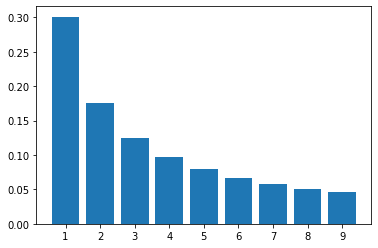

In [48]:
digits = np.arange(1,10) # digits 1 - 9
digits

benford_percentages = np.log10(1 + 1 / digits)
benford_percentages

plt.bar(digits, benford_percentages)
plt.xticks(digits);

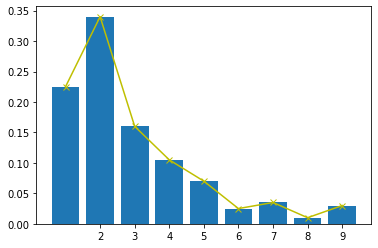

In [49]:
plt.bar(percentages.index, percentages )
plt.xticks(digits)
plt.plot(percentages, color='y', marker='x');